In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

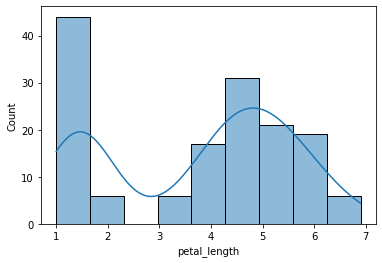

In [8]:
sns.histplot(x= 'petal_length',data = iris,kde=True)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

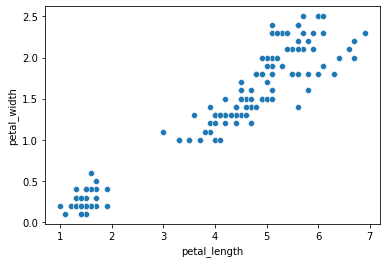

In [10]:
sns.scatterplot(x='petal_length',y='petal_width',data=iris)
#Strong correlation, maybe around .8?

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

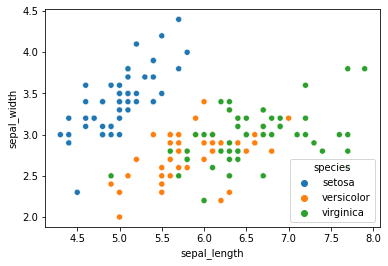

In [12]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=iris)
#Yes, you could predict species based off the sepal ratio

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

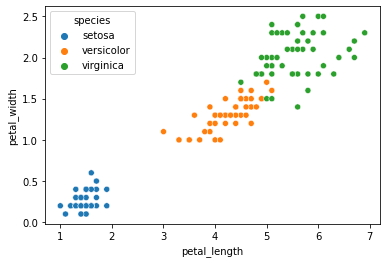

In [18]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=iris)
# petal_length or petal_width would be best to predict species

In [20]:
anscombe = sns.load_dataset('anscombe')

In [23]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [30]:
anscombe.groupby('dataset').describe()
# Each dataset has very similar statistics

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

<AxesSubplot:xlabel='x', ylabel='y'>

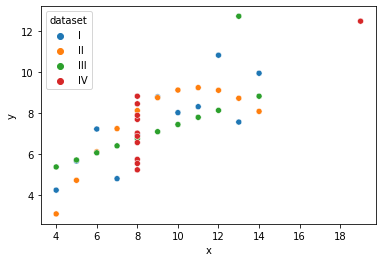

In [45]:
sns.scatterplot(data = anscombe, x = 'x', y = 'y', hue = 'dataset')
#Despite the summary statistics being very identical, that actual data points are very different

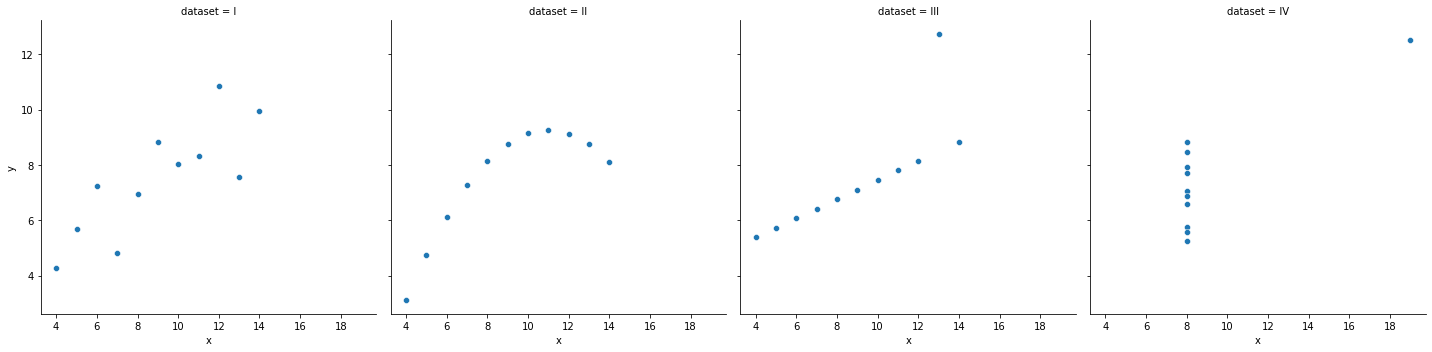

In [47]:
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

In [35]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [40]:
import pydataset
swiss = pydataset.data('swiss')
insect_sprays = pydataset.data('InsectSprays')

In [43]:
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:ylabel='count'>

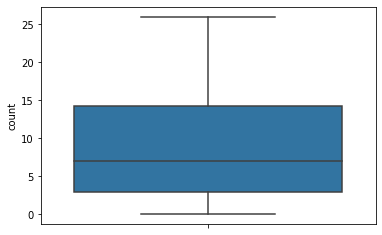

In [49]:
sns.boxplot(y = 'count', data = insect_sprays)

In [50]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [51]:
swiss['is_catholic'] = swiss.Catholic > 50

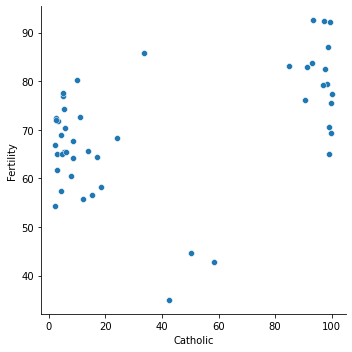

In [52]:
sns.relplot(x='Catholic',y='Fertility',data=swiss)

In [54]:
swiss.corr() #education closely followed by examination is most correlated with fertility

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


In [68]:
import env
import pandas as pd
import os
def get_db_url(db, env_file=os.path.exists('env.py')):
    if env_file:
        username, pword, host = (env.user,env.password,env.host)
        return f'mysql+pymysql://{username}:{pword}@{host}/{db}'
    else:
        print('You need an env.py file in your directory')

url = get_db_url('chipotle')
query = 'SELECT * FROM orders'
chipotle = pd.read_sql(query,url)

In [69]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [70]:
chipotle['revenue'] = chipotle.quantity * chipotle.item_price.str.replace('$','').astype(float)

/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_33732/3230772327.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle['revenue'] = chipotle.quantity * chipotle.item_price.str.replace('$','').astype(float)


In [71]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,33.96


In [92]:
top_four_rev = chipotle.groupby('item_name').revenue.sum().nlargest(4)

Text(0.5, 1.0, 'Top Revenue Producing Items: Chipotle')

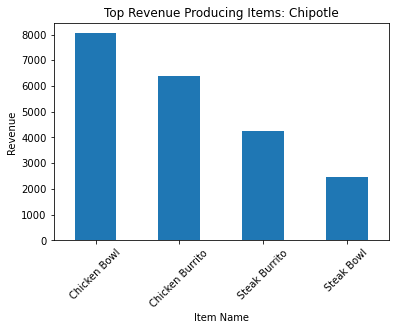

In [99]:
top_four_rev.plot.bar(x = top_four_rev.index)
plt.ylabel('Revenue')
plt.xlabel('Item Name')
plt.xticks(rotation=45)
plt.title('Top Revenue Producing Items: Chipotle')

In [101]:
sleepstudy = pydataset.data('sleepstudy')

In [102]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [103]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

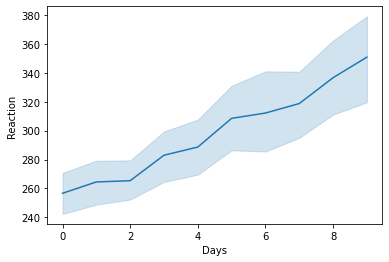

In [109]:
sns.lineplot(x='Days',y='Reaction',data=sleepstudy)

In [121]:
sleepstudy['subject_unique'] = sleepstudy.Subject.map({308:0, 309:1, 310:2, 330:3, 331:4, 332:5, 333:6, 334:7, 335:8, 337:9 , 349:10, 350:11, 351:12,
       352:13, 369:14, 370:15, 371:16, 372:17})

In [122]:
sleepstudy.head()

,Reaction,Days,Subject,subject_unique
1,249.5600,0,308,0
2,258.7047,1,308,0
3,250.8006,2,308,0
4,321.4398,3,308,0
5,356.8519,4,308,0


<AxesSubplot:xlabel='subject_unique', ylabel='Reaction'>

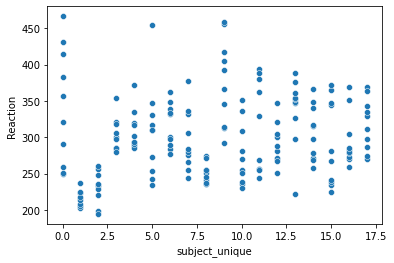

In [123]:
sns.scatterplot(x='subject_unique',y='Reaction',data=sleepstudy)


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

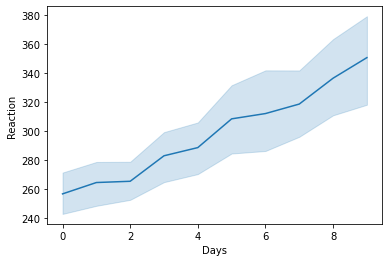

In [125]:
sns.lineplot(x='Days',y='Reaction',data=sleepstudy)